,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0



* Model: Random Forest
Cross-Validation Accuracy Scores: [0.963  0.2835 0.291  0.974  0.9765]
Mean Accuracy: 0.6976
Std Dev: 0.3351

* Model: SVM
Cross-Validation Accuracy Scores: [0.2    0.1475 0.1465 0.1845 0.181 ]
Mean Accuracy: 0.1719
Std Dev: 0.0213

* Model: Logistic Regression
Cross-Validation Accuracy Scores: [0.175  0.148  0.141  0.1745 0.158 ]
Mean Accuracy: 0.1593
Std Dev: 0.0137


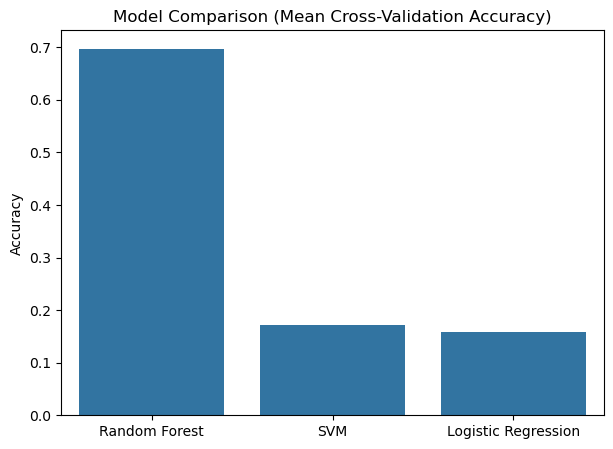

In [4]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

# Step 2: Load Dataset
df = pd.read_csv('StudentPerformance.csv')

display(df.head())



# Step 3: Data Preprocessing
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col].astype(str))

imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Separate features and target
X = df.drop('Class/ASD', axis=1, errors='ignore')
y = df['Class/ASD'] if 'Class/ASD' in df.columns else df.iloc[:, -1]

# Step 4: Feature Union using append()
features = []   # empty list to store feature extraction steps

# Append PCA and SelectKBest dynamically
features.append(('pca', PCA(n_components=5)))           # you can change n_components
features.append(('kbest', SelectKBest(f_classif, k=5))) # select top 5 features

# Combine both using FeatureUnion
combined_features = FeatureUnion(features)

# Step 5: Define models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

# Step 6: Create pipeline with combined features
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('features', combined_features),
        ('classifier', model)
    ])
    
    # Perform Cross-Validation
    scores = cross_val_score(pipeline, X, y, cv=kf, scoring='accuracy')
    
    print(f"\n* Model: {name}")
    print(f"Cross-Validation Accuracy Scores: {scores}")
    print(f"Mean Accuracy: {scores.mean():.4f}")
    print(f"Std Dev: {scores.std():.4f}")

# Step 7: Visualize Comparison
model_names = list(models.keys())
mean_scores = [
    cross_val_score(Pipeline([
        ('scaler', StandardScaler()),
        ('features', combined_features),
        ('classifier', models[m])
    ]), X, y, cv=kf, scoring='accuracy').mean() for m in model_names
]

plt.figure(figsize=(7,5))
sns.barplot(x=model_names, y=mean_scores)
plt.title("Model Comparison (Mean Cross-Validation Accuracy)")
plt.ylabel("Accuracy")
plt.show()

Dataset Head:


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0



Dataset Shape: (10000, 6)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB
None

--- Data Preprocessing ---
